# EDA-Diamond

In [24]:
import pandas as pd
import numpy as np 
import sys
import re
sys.path.insert(0, "modules")

import numpy as np
import pandas as pd

import plotly.express as px



import cufflinks as cf
cf.go_offline()


import matplotlib.pyplot as plt   

import seaborn as sns

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

In [25]:
df_city=pd.read_csv('diamonds_train_data/csv_tables/diamonds_city.csv')
df_properties=pd.read_csv('diamonds_train_data/csv_tables/diamonds_properties.csv')
df_dimensions=pd.read_csv('diamonds_train_data/csv_tables/diamonds_dimensions.csv')
df_cut=pd.read_csv('diamonds_train_data/csv_tables/diamonds_cut.csv')
df_clarity=pd.read_csv('diamonds_train_data/csv_tables/diamonds_clarity.csv')
df_color=pd.read_csv('diamonds_train_data/csv_tables/diamonds_color.csv')
df_transactional=pd.read_csv('diamonds_train_data/csv_tables/diamonds_transactional.csv')


In [26]:
df_merged=  pd.merge(df_cut, df_properties, on='cut_id', how='inner') 
df_merged=  pd.merge(df_merged, df_color, on='color_id', how='inner') 
df_merged=  pd.merge(df_merged, df_clarity, on='clarity_id', how='inner') 
df_merged=  pd.merge(df_merged, df_transactional, on='index_id', how='inner') 
df_merged=  pd.merge(df_merged, df_city, on='city_id', how='inner') 
df_merged=  pd.merge(df_merged, df_dimensions, on='index_id', how='inner') 

df_merged

,cut_id,cut,index_id,color_id,clarity_id,color,clarity,price,city_id,carat,city,depth,table,x,y,z
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,H,VS2,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,Antwerp,63.0,57.0,4.35,4.38,2.75
1,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good,fa4ddf29f41b575377ce14a7900d1e26b669163ca53b80...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,H,VS2,6189,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.21,Antwerp,62.9,57.0,6.75,6.80,4.26
2,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good,46f9d22816179479bd27b0036854788327eedf3f6f5d8d...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,H,VS2,5450,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.11,Antwerp,62.4,58.0,6.57,6.69,4.14
3,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good,c2d735ed61274b73ed20a49594661e35185797b6ee082c...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,H,VS2,5264,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.07,Antwerp,62.7,57.0,6.48,6.53,4.08
4,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good,c5de86654f0e517de7569a0bf431390345b54ba288ba6c...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,H,VS2,5480,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.06,Antwerp,62.4,56.0,6.49,6.56,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal,63665927228bd77797a53cc60289b11bda9be097dd5a5a...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,I,IF,652,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.31,New York City,61.3,57.0,4.34,4.40,2.68
40451,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal,e440944fefba2c8066ad2ebdb328d3bfa99f182342b3d2...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,I,IF,635,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.31,New York City,60.9,57.0,4.37,4.40,2.67
40452,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good,3ca0b4dbd418e3b0f128c51b3cde87cf8ca316e1154e7e...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,I,IF,3669,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.90,New York City,63.7,64.0,6.07,6.02,3.85
40453,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium,8b80f49ec2822cb3cdbe97d9405e39ae40ba418b084c06...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,I,IF,1056,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.43,New York City,61.2,58.0,4.83,4.88,2.97


### Modelo desnormalizado

In [27]:
columns_to_drop = ['cut_id', 'index_id','color_id','clarity_id','city_id']

df_merged = df_merged.drop(columns=columns_to_drop)

df_merged

,cut,color,clarity,price,carat,city,depth,table,x,y,z
0,Very Good,H,VS2,505,0.32,Antwerp,63.0,57.0,4.35,4.38,2.75
1,Very Good,H,VS2,6189,1.21,Antwerp,62.9,57.0,6.75,6.80,4.26
2,Very Good,H,VS2,5450,1.11,Antwerp,62.4,58.0,6.57,6.69,4.14
3,Very Good,H,VS2,5264,1.07,Antwerp,62.7,57.0,6.48,6.53,4.08
4,Very Good,H,VS2,5480,1.06,Antwerp,62.4,56.0,6.49,6.56,4.07
...,...,...,...,...,...,...,...,...,...,...,...
40450,Ideal,I,IF,652,0.31,New York City,61.3,57.0,4.34,4.40,2.68
40451,Ideal,I,IF,635,0.31,New York City,60.9,57.0,4.37,4.40,2.67
40452,Good,I,IF,3669,0.90,New York City,63.7,64.0,6.07,6.02,3.85
40453,Premium,I,IF,1056,0.43,New York City,61.2,58.0,4.83,4.88,2.97


In [28]:
df_merged.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [29]:
df_merged = df_merged[df_merged['z'] != 0]
df_merged.sort_values(by='price').T

,6769,13858,36785,6156,24880,15731,35725,39138,7206,3013,...,4132,36155,18134,3681,8143,11439,7345,15044,38650,33424
cut,Premium,Ideal,Good,Premium,Good,Very Good,Fair,Very Good,Good,Ideal,...,Premium,Ideal,Premium,Ideal,Premium,Premium,Premium,Ideal,Very Good,Premium
color,E,E,E,I,J,H,E,H,J,J,...,F,G,F,G,I,H,I,G,G,I
clarity,SI1,SI2,VS1,VS2,SI2,SI1,VS2,VS1,SI1,VS1,...,SI2,SI1,VS2,SI2,VS1,SI1,SI1,IF,SI1,VS2
price,326,326,327,334,335,337,337,338,339,340,...,18784,18787,18791,18791,18795,18795,18797,18806,18818,18823
carat,0.21,0.23,0.23,0.29,0.31,0.26,0.22,0.23,0.3,0.23,...,2.05,2.05,1.71,2.15,2.0,2.04,2.29,1.51,2.0,2.29
city,Surat,Kimberly,Las Vegas,Surat,Amsterdam,London,Las Vegas,New York City,Surat,Antwerp,...,Antwerp,Las Vegas,Luxembourg,Antwerp,Surat,Kimberly,Surat,Kimberly,New York City,Tel Aviv
depth,59.8,61.5,56.9,62.4,63.3,61.9,65.1,59.4,64.0,62.8,...,60.2,61.9,62.3,62.6,60.8,58.1,61.8,61.7,63.5,60.8
table,61.0,55.0,65.0,58.0,58.0,55.0,61.0,61.0,55.0,56.0,...,59.0,57.0,59.0,54.0,59.0,60.0,59.0,55.0,56.0,60.0
x,3.89,3.95,4.05,4.2,4.34,4.07,3.87,4.0,4.25,3.93,...,8.28,8.1,7.57,8.29,8.13,8.37,8.52,7.37,7.9,8.5
y,3.84,3.98,4.07,4.23,4.35,4.11,3.78,4.05,4.28,3.9,...,8.33,8.16,7.53,8.35,8.02,8.28,8.45,7.41,7.97,8.47


In [30]:
#todos los 0 de x e y coinciden en los de z. 

In [31]:
#Los quilates denotan el peso de un diamante, no su tamaño. Tiffany mide los diamantes en milésimas de quilate
#La claridad del diamante mide la pureza y la singularidad de la piedra y se califica en función de la visibilidad de estas características bajo una ampliación de 10 aumentos
#El color se refiere al tono natural inherente a los diamantes blancos. En la naturaleza, la mayoría de los diamantes blancos tienen un ligero tono amarillo. Cuanto más cerca esté un diamante de ser “incoloro”, más excepcional es. De más calidad a menos 
#La más importante de las 4 cualidades, la talla, hace referencia a la manera en la que las facetas de un diamante interactúan con la luz. Está determinada por la simetría, la proporción y el pulido. La talla determina la belleza de una gema en mayor medida que ningún otro factor.
#Un diamante bien proporcionado debe tener un porcentaje de profundidad total de alrededor del 60%, idealmente entre 57.5% y 63%. 


In [32]:
def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [33]:
# Features analysis
col_diamonds = list(df_merged.columns)
categorics_diamonds=['cut',
 'color',
 'clarity',
 'city']
cat_diamonds = cat_var(df_merged, categorics_diamonds)
cat_diamonds

,categorical_variable,number_of_possible_values,values
0,city,13,"[Antwerp, Surat, Kimberly, London, Luxembourg,..."
1,clarity,8,"[VS2, SI1, VS1, VVS1, SI2, I1, VVS2, IF]"
2,color,7,"[H, G, E, D, F, J, I]"
3,cut,5,"[Very Good, Ideal, Good, Premium, Fair]"


In [35]:
df_merged =df_merged[df_merged['carat'] <= 2.5]
df_merged = df_merged[df_merged['y'] <= 8.5]
df_merged = df_merged[df_merged['x'] <= 8.5]
df_merged = df_merged[df_merged['z'] <= 5.5]

In [36]:
price_ranges = df_merged.groupby('clarity')['price'].agg(['min', 'max', 'mean']).reset_index()
price_ranges.columns = ['clarity', 'Min Price', 'Max Price','Mean']

In [37]:
price_ranges.sort_values(by='Mean')


,clarity,Min Price,Max Price,Mean
6,VVS1,395,18777,2559.498558
1,IF,369,18806,2797.897513
7,VVS2,354,18718,3240.978942
0,I1,361,10685,3491.298479
4,VS1,327,18795,3772.399405
5,VS2,334,18823,3878.576122
2,SI1,326,18818,3948.602946
3,SI2,326,18791,4890.782474


In [41]:
price_ranges_cut = df_merged.groupby('cut')['price'].agg(['min', 'max', 'mean']).reset_index()
price_ranges_cut.columns = ['cut', 'Min Price', 'Max Price','Mean']
price_ranges_cut.sort_values(by='Mean')

,cut,Min Price,Max Price,Mean
2,Ideal,326,18806,3393.669183
1,Good,327,18707,3804.011548
4,Very Good,337,18818,3943.067138
0,Fair,337,18574,4147.392617
3,Premium,326,18823,4508.452871


In [40]:
price_ranges_color = df_merged.groupby('color')['price'].agg(['min', 'max', 'mean']).reset_index()
price_ranges_color.columns = ['color', 'Min Price', 'Max Price','Mean']
price_ranges_color.sort_values(by='Mean')

,color,Min Price,Max Price,Mean
1,E,326,18731,3080.820355
0,D,357,18693,3124.534589
2,F,342,18791,3662.715662
3,G,354,18818,3994.834935
4,H,337,18795,4377.571245
5,I,334,18823,4899.901337
6,J,335,18594,4969.184593


In [16]:
price_ranges_carat = df_merged.groupby('carat')['price'].agg(['min', 'max', 'mean']).reset_index()
price_ranges_carat.columns = ['carat', 'Min Price', 'Max Price','Mean']
price_ranges_carat.sort_values(by='Mean')

,carat,Min Price,Max Price,Mean
0,0.20,345,367,363.333333
1,0.21,326,394,380.222222
2,0.22,337,470,391.400000
3,0.23,326,688,487.261682
4,0.24,357,752,506.778378
...,...,...,...,...
173,1.93,17353,18306,17884.666667
269,4.50,18531,18531,18531.000000
258,3.04,18559,18559,18559.000000
246,2.67,18686,18686,18686.000000


In [42]:
price_ranges_x = df_merged.groupby('table')['price'].agg(['min', 'max', 'mean']).reset_index()
price_ranges_x.columns = ['table', 'Min Price', 'Max Price','Mean']
price_ranges_x.sort_values(by='table').T

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
table,43.0,44.0,49.0,50.0,50.1,51.000,52.000000,52.4,52.8,53.000000,...,65.000000,66.000000,67.00,68.000000,69.0,70.0,73.0,76.0,79.0,95.0
Min Price,4997.0,474.0,630.0,4227.0,3353.0,833.000,458.000000,1679.0,475.0,362.000000,...,327.000000,369.000000,810.00,1348.000000,1122.0,1293.0,2100.0,2362.0,2301.0,13387.0
Max Price,4997.0,474.0,3951.0,13764.0,3353.0,15888.000,18440.000000,1679.0,830.0,18198.000000,...,16624.000000,15627.000000,11263.00,11322.000000,12923.0,11102.0,2579.0,2362.0,2301.0,13387.0
Mean,4997.0,474.0,2290.5,8995.5,3353.0,4336.375,4044.909091,1679.0,652.5,3115.609639,...,3911.367925,3724.076923,3585.75,4763.461538,5718.0,3263.5,2349.0,2362.0,2301.0,13387.0


In [123]:
df_filtered = df_merged[df_merged['price'] <= 10000]
df_filtered = df_filtered[df_merged['carat'] <= 2]
df_filtered
df_merged=df_filtered

In [115]:
df_filtered.describe()

,price,carat,depth,table,x,y,z
count,36458.000000,36458.000000,36458.000000,36458.000000,36458.000000,36458.000000,36458.000000
mean,2877.354326,0.693119,61.762291,57.396229,5.515378,5.518598,3.407209
std,2393.129775,0.352305,1.421105,2.228429,0.946927,0.939709,0.587042
min,326.000000,0.200000,43.000000,43.000000,3.770000,3.720000,1.070000
25%,886.000000,0.380000,61.100000,56.000000,4.640000,4.650000,2.850000
50%,2003.000000,0.590000,61.800000,57.000000,5.410000,5.420000,3.330000
75%,4385.000000,1.010000,62.500000,59.000000,6.370000,6.370000,3.950000
max,10000.000000,2.000000,79.000000,79.000000,8.190000,8.110000,5.370000


NameError: name 'plt' is not defined

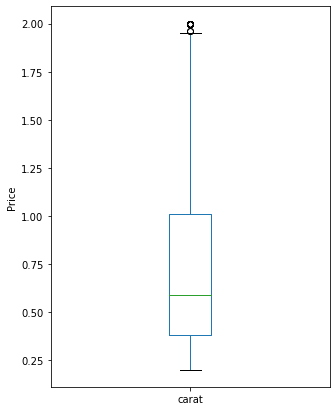

In [116]:
data = df_filtered['carat']
ax = data.plot.box(figsize=(5, 7))
ax.set_ylabel('Price')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()

### EDA - estadisticos 


In [18]:
df_merged.info()
#datos numericos = price, carat, depth, table, x, y, z

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      40455 non-null  object 
 1   color    40455 non-null  object 
 2   clarity  40455 non-null  object 
 3   price    40455 non-null  int64  
 4   carat    40455 non-null  float64
 5   city     40455 non-null  object 
 6   depth    40455 non-null  float64
 7   table    40455 non-null  float64
 8   x        40455 non-null  float64
 9   y        40455 non-null  float64
 10  z        40455 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


In [19]:
#No hay nulos, aunque conviene comprobarlo 


# Variables Númericas

In [20]:
#datos numéricos : price, carat, depth, table, x, y, z--(media, varianza, distribucion, correlacion)

In [21]:
df_merged.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [22]:
#la media de precio sobre 4k pero con una desviacion muy alta ya que el rango es de 400-18k.Tenemos outliers por arriba, por eso la mediana es más baja que la media. 
#carat rango de 0,2 a 4,5 con una media más cercana al minimo 0,8
#MINIMOS de x,y,z 0 puede que este mal, revisar ese dato 


In [23]:
# Percentiles table (equal-count bins). Quartiles and Deciles are usually used.
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = df_merged['price'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

#la mayoria de diamantes tienen precios menores de 5k 75%

,5%,25%,50%,75%,95%
price,544.0,945.0,2397.0,5331.0,13132.0


NameError: name 'plt' is not defined

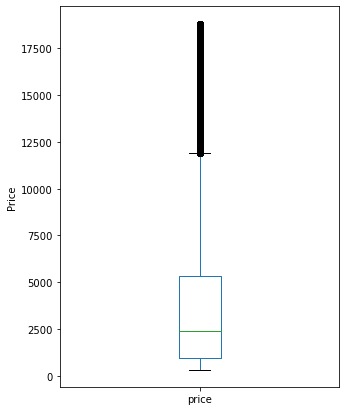

In [84]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data = df_merged['price']
ax = data.plot.box(figsize=(5, 7))
ax.set_ylabel('Price')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()



In [ ]:
# Frequency table (equal-size bins)

binnedPrice = pd.cut(df_merged['price'], 10)

binnedPrice.name = 'binnedPrice'
df = pd.concat([df_merged, binnedPrice], axis=1)
df = df.sort_values(by='price')
df.head()

In [25]:
groups = []
for group, subset in df.groupby(by='binnedPrice'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'MeanPrice': subset['price'].mean(),
        'MaxPrice': subset['price'].max(),
        'MinPrice': subset['price'].min(),
        'MeanCarat': subset['carat'].mean(),
        'MeanDepth': subset['depth'].mean(),
        'MeanTable': subset['table'].mean()
    })
    
    
binrange = pd.DataFrame(groups)
binrange

KeyError: 'binnedPrice'

NameError: name 'plt' is not defined

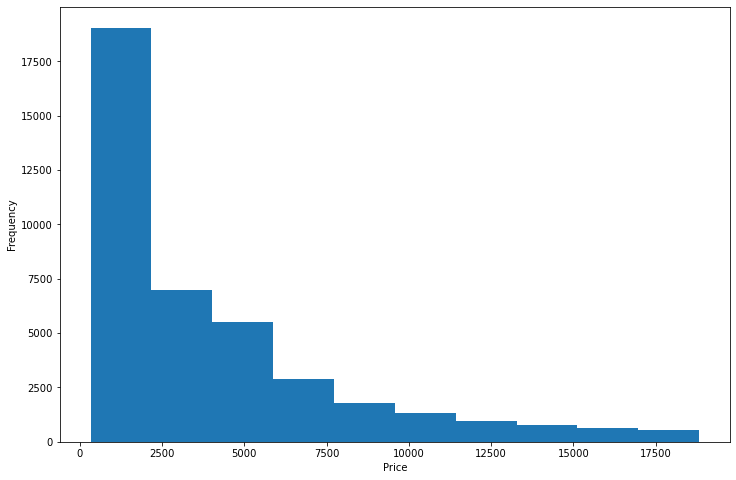

In [26]:
# Histogram (or plotting the frequency table)

#data = state['Population'] / 1_000_000
data = df_merged['price']
ax = data.plot.hist(figsize=(12, 8))
#ax.set_xlabel('Population (millions)')
ax.set_xlabel('Price')
plt.tight_layout()

In [ ]:
# Density plot calculated from data using a kernel density estimate implementation (area under the curve == 1)

ax = data.plot.hist(density=True,
                    #xlim=[0, 12], 
                    #bins=range(1,12),
                    figsize=(12, 8))
data.plot.density(ax=ax)
#ax.set_xlabel('Population (millions)')
ax.set_xlabel('Price')
plt.tight_layout()

In [27]:
correlations=df_merged[['price','carat','depth','table','x','y','z']].corr()

correlations

,price,carat,depth,table,x,y,z
price,1.000000,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500
carat,0.921935,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570
depth,-0.014864,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.130111,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.885848,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.866163,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828
z,0.874500,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000


In [40]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    df_enc = df.copy()
    for column in df.columns:
        if df[column].dtype == 'object':
            enc_label = LabelEncoder()
            df_enc[column] = enc_label.fit_transform(df[column])
    return df_enc
df_merged_encoded=label_encoder(df_merged)

In [41]:
df_merged_encoded.corr()

,cut,color,clarity,price,carat,city,depth,table,x,y,z
cut,1.000000,-0.000461,0.029184,0.044885,0.021164,-0.006189,-0.196852,0.153463,0.026544,0.032142,0.005101
color,-0.000461,1.000000,-0.031686,0.174855,0.294027,-0.002055,0.047988,0.031120,0.272498,0.265611,0.275022
clarity,0.029184,-0.031686,1.000000,-0.074228,-0.218085,-0.002147,-0.058557,-0.084253,-0.228392,-0.219984,-0.230862
price,0.044885,0.174855,-0.074228,1.000000,0.921935,-0.000798,-0.014864,0.130111,0.885848,0.866163,0.874500
carat,0.021164,0.294027,-0.218085,0.921935,1.000000,-0.000381,0.026528,0.183392,0.975688,0.951667,0.967570
city,-0.006189,-0.002055,-0.002147,-0.000798,-0.000381,1.000000,-0.006268,-0.002667,0.000438,-0.001115,-0.000082
depth,-0.196852,0.047988,-0.058557,-0.014864,0.026528,-0.006268,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.153463,0.031120,-0.084253,0.130111,0.183392,-0.002667,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.026544,0.272498,-0.228392,0.885848,0.975688,0.000438,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.032142,0.265611,-0.219984,0.866163,0.951667,-0.001115,-0.030966,0.184673,0.973712,1.000000,0.964828


In [29]:
# las variables x,y,z están muy correlacionadas, es posible que no aporten valor en el modelo de Machine Learning. Podemos usar solo una o crear una entre las dos 


In [30]:
correlations_price=df_merged[['price','carat','depth','table','x','y','z']].corr()
correlations_price = correlations.sort_values(by='price', ascending=False)
correlations_price.price

price    1.000000
carat    0.921935
x        0.885848
z        0.874500
y        0.866163
table    0.130111
depth   -0.014864
Name: price, dtype: float64

In [31]:
# Correlation matrix heatmap 
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(correlations,
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 # https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
                 ax=ax)
plt.tight_layout()

NameError: name 'plt' is not defined

In [29]:
# Scatterplots (dominant quadrants give correlation info)

def scatterplot (df, variable):
    ax = df.plot.scatter(x=variable,
                             y='price',
                             figsize=(10, 10),
                             marker='$\u25EF$',
                             alpha=1,
                             s=50)  # Increased marker size
    ax.set_xlabel(variable)
    ax.set_ylabel('Price')
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    plt.xlim([df_merged[variable].min(), df_merged[variable].max()])  # Adjusted x-axis limits
    plt.ylim([df_merged['price'].min(), df_merged['price'].max()])  # Adjusted y-axis limits
    plt.tight_layout()
    return plt.show()

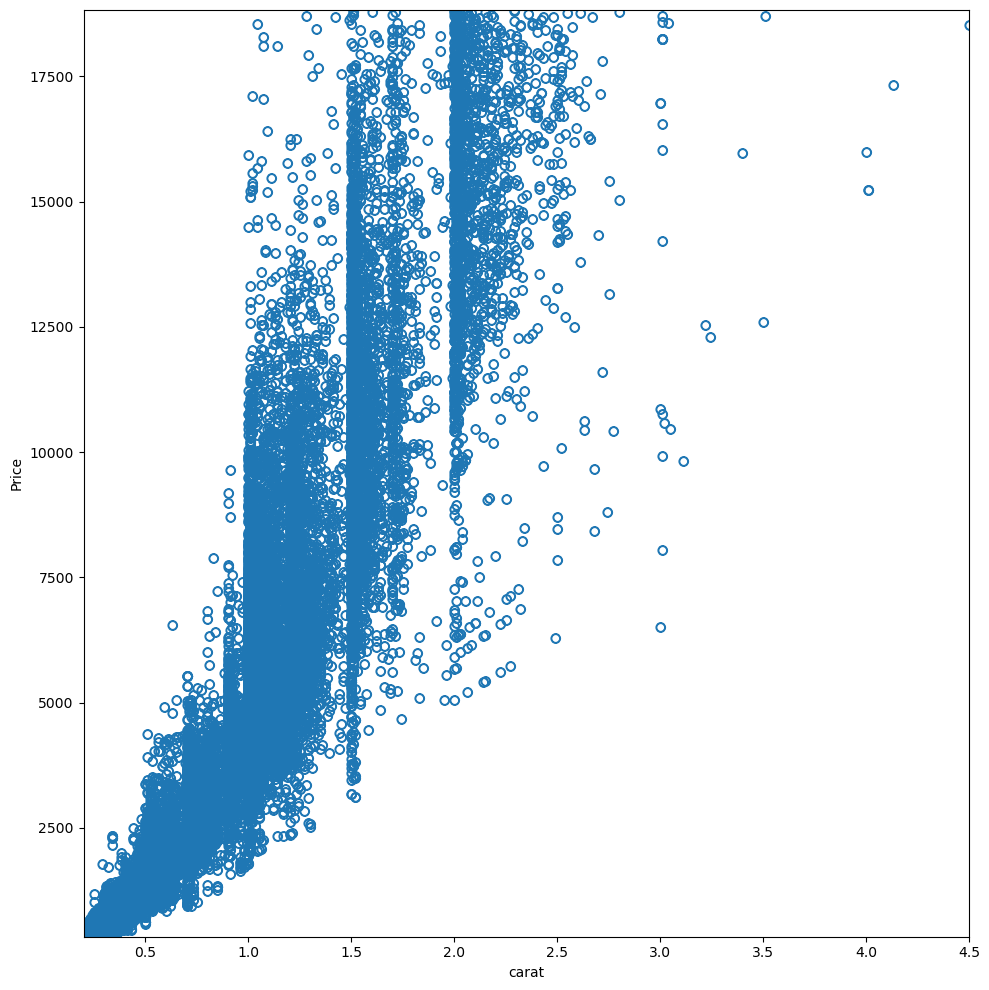

In [30]:
scatterplot (df_merged, 'carat')

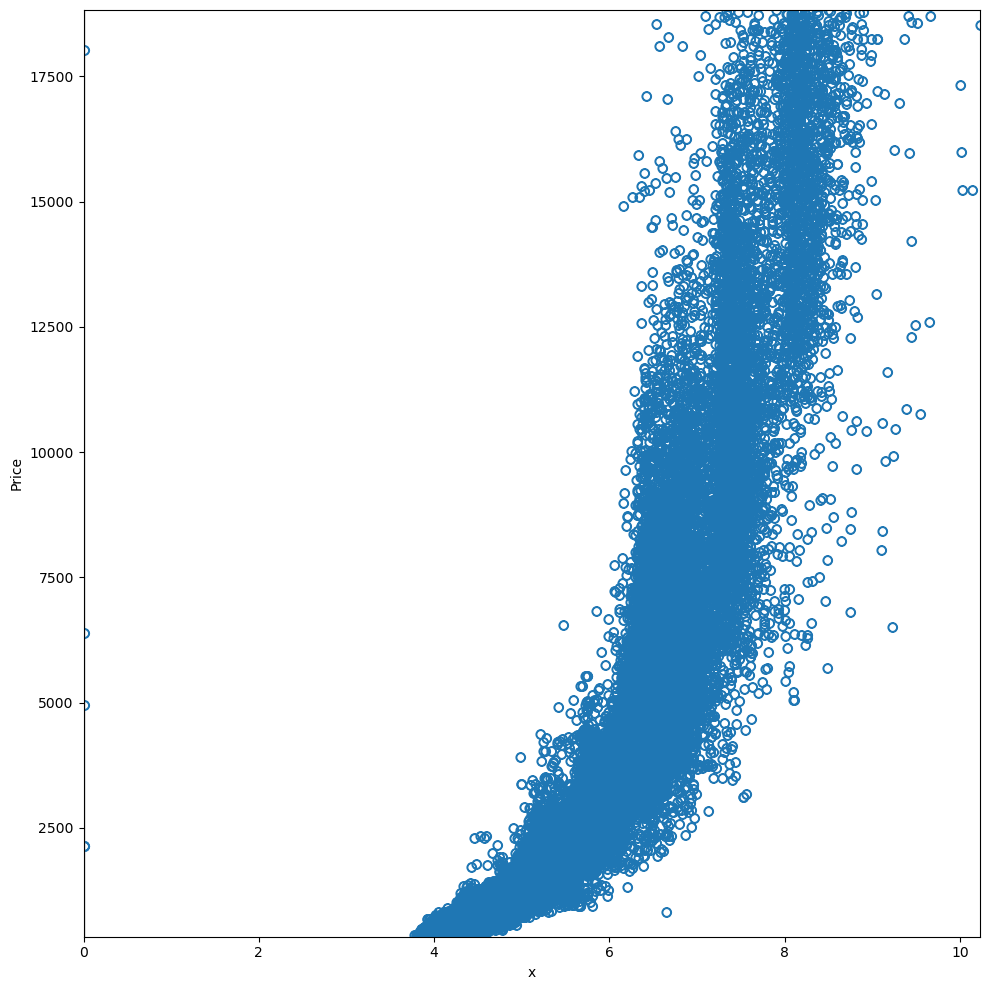

In [31]:
scatterplot (df_merged, 'x')

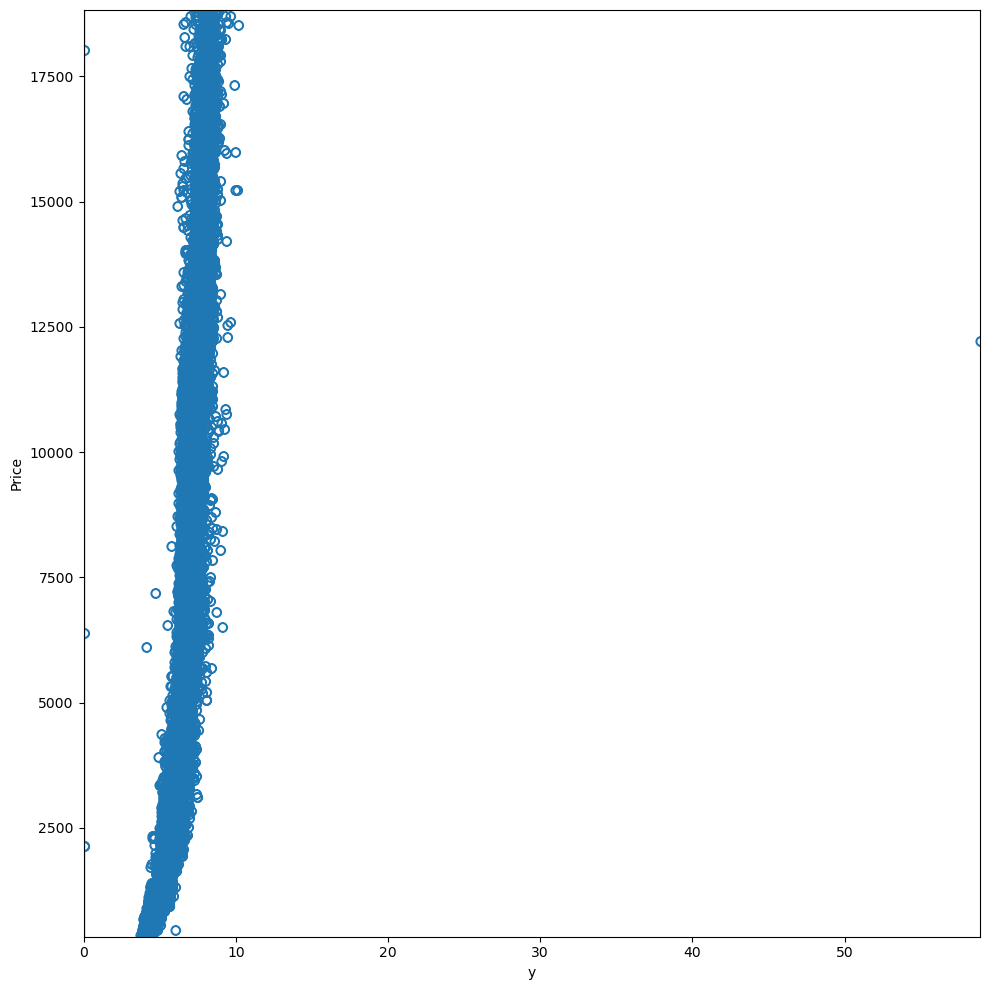

In [32]:
scatterplot (df_merged, 'y')

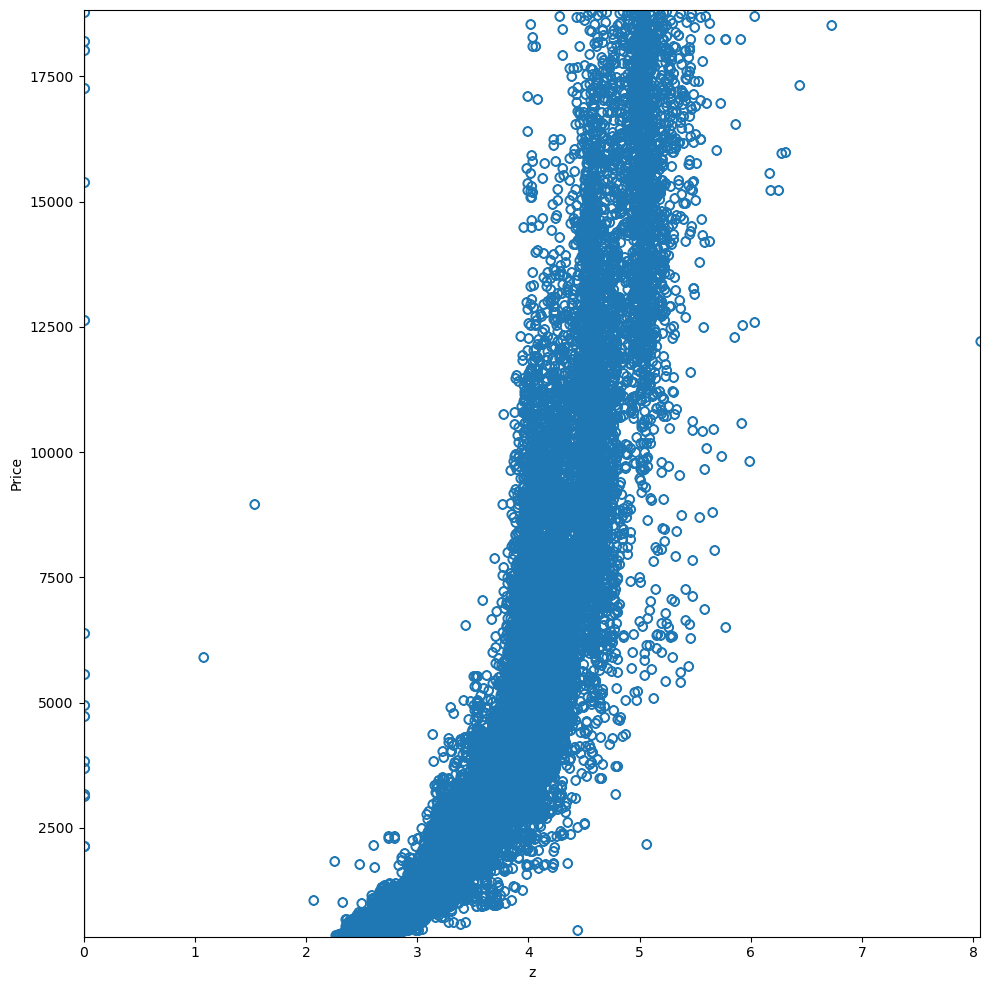

In [33]:
scatterplot (df_merged, 'z')

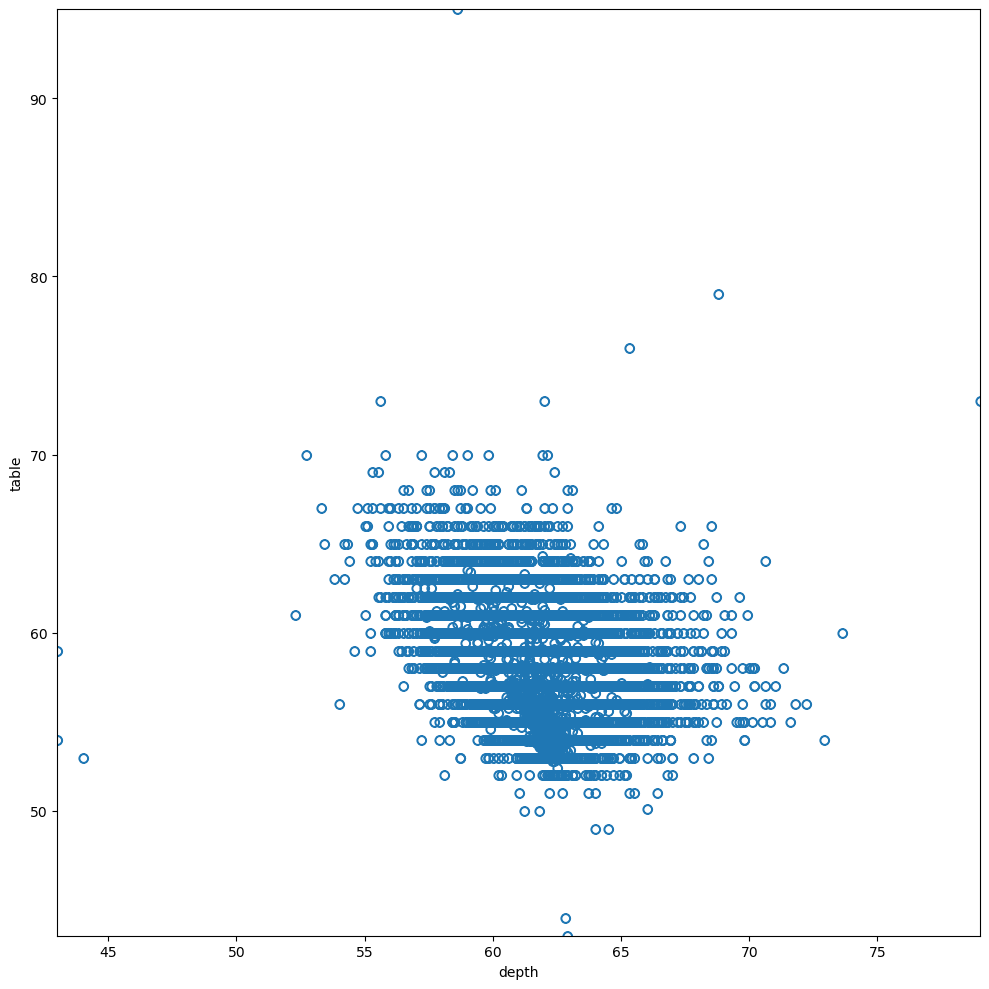

In [34]:
ax = df_merged.plot.scatter(x='depth',
                             y='table',
                             figsize=(10, 10),
                             marker='$\u25EF$',
                             alpha=1,
                             s=50)  # Increased marker size
ax.set_xlabel('depth')
ax.set_ylabel('table')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.xlim([df_merged['depth'].min(), df_merged['depth'].max()])  # Adjusted x-axis limits
plt.ylim([df_merged['table'].min(), df_merged['table'].max()])  # Adjusted y-axis limits
plt.tight_layout()
plt.show()

# Variables categoricas



In [35]:
#datos categoricos : color, city, cut,clarity--(sacar la moda y proporciones)

In [36]:
df_merged.color.unique()

array(['H', 'G', 'E', 'D', 'F', 'J', 'I'], dtype=object)

In [37]:
df_merged['color'].mode()

0    G
Name: color, dtype: object

In [38]:
df_merged.city.unique()

array(['Antwerp', 'Surat', 'Kimberly', 'London', 'Luxembourg', 'Paris',
       'Amsterdam', 'Zurich', 'Dubai', 'Madrid', 'Tel Aviv', 'Las Vegas',
       'New York City'], dtype=object)

In [39]:
df_merged['city'].mode()

0    Antwerp
Name: city, dtype: object

In [40]:
df_merged.cut.unique()

array(['Very Good', 'Ideal', 'Good', 'Premium', 'Fair'], dtype=object)

In [41]:
df_merged['cut'].mode()

0    Ideal
Name: cut, dtype: object

In [42]:
df_merged.clarity.unique()


array(['VS2', 'SI1', 'VS1', 'VVS1', 'SI2', 'I1', 'VVS2', 'IF'],
      dtype=object)

In [43]:
df_merged['clarity'].mode()

0    SI1
Name: clarity, dtype: object

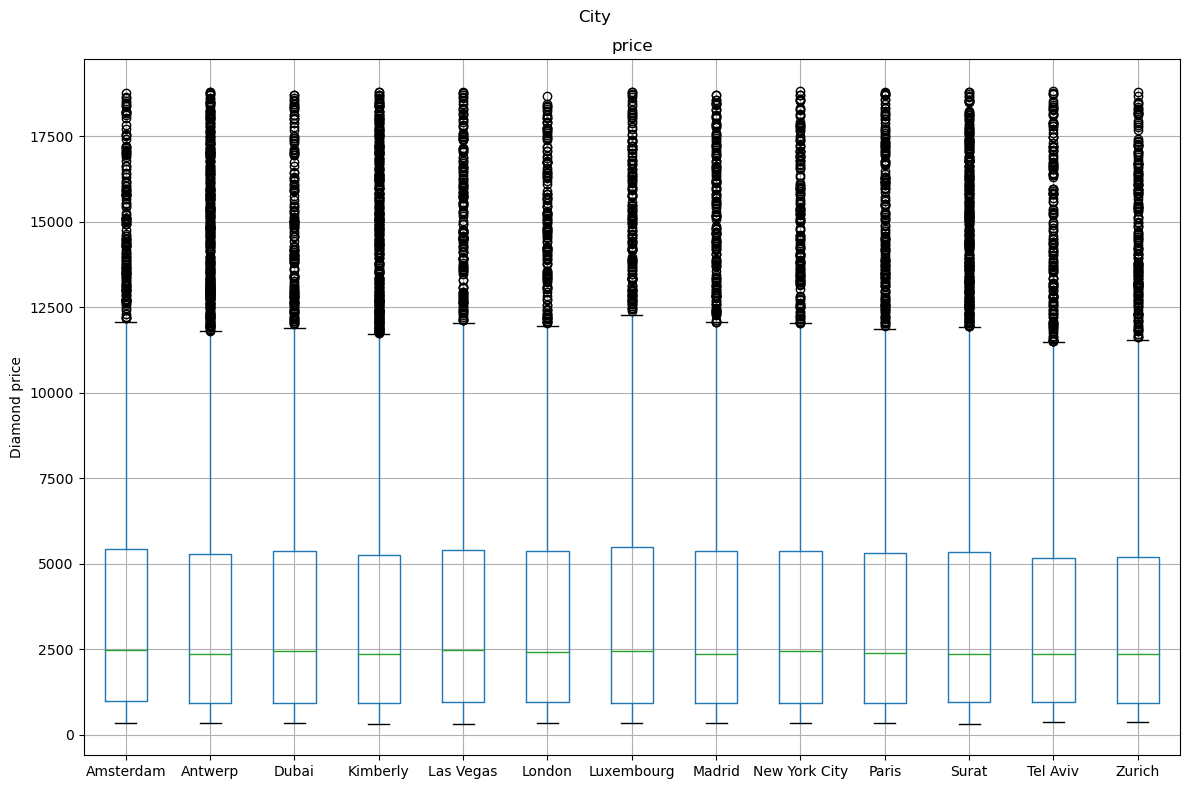

In [44]:
# Categorical and numeric data (Boxplots)

ax =df_merged.boxplot(by='city',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('Diamond price')
plt.suptitle('City')
plt.tight_layout()

In [45]:
#la ciudad no aporta informacion 



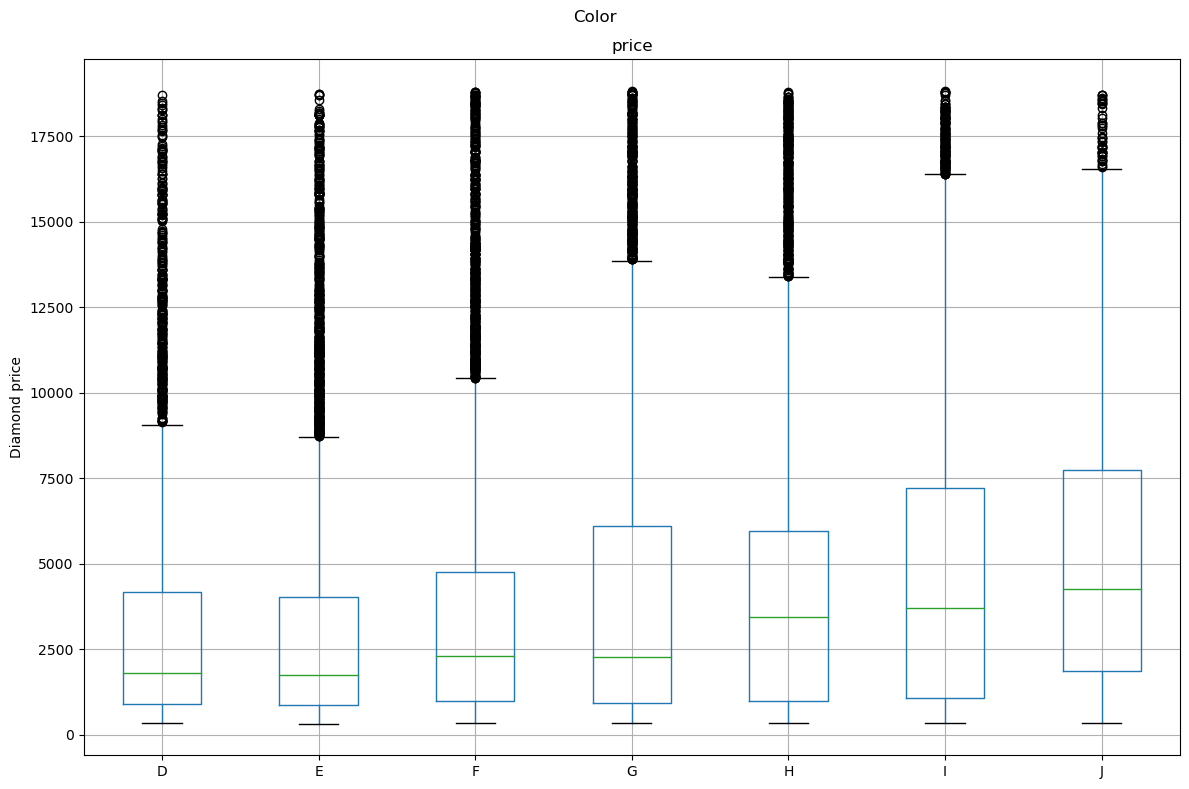

In [46]:
ax = df_merged.boxplot(by='color',
                           column='price',
                           figsize=(12, 8),
                           )
ax.set_xlabel('')
ax.set_ylabel('Diamond price')
plt.suptitle('Color')
plt.tight_layout()

In [47]:
#Se intuye que el color afecta en el precio, de forma ascendente de la D-J

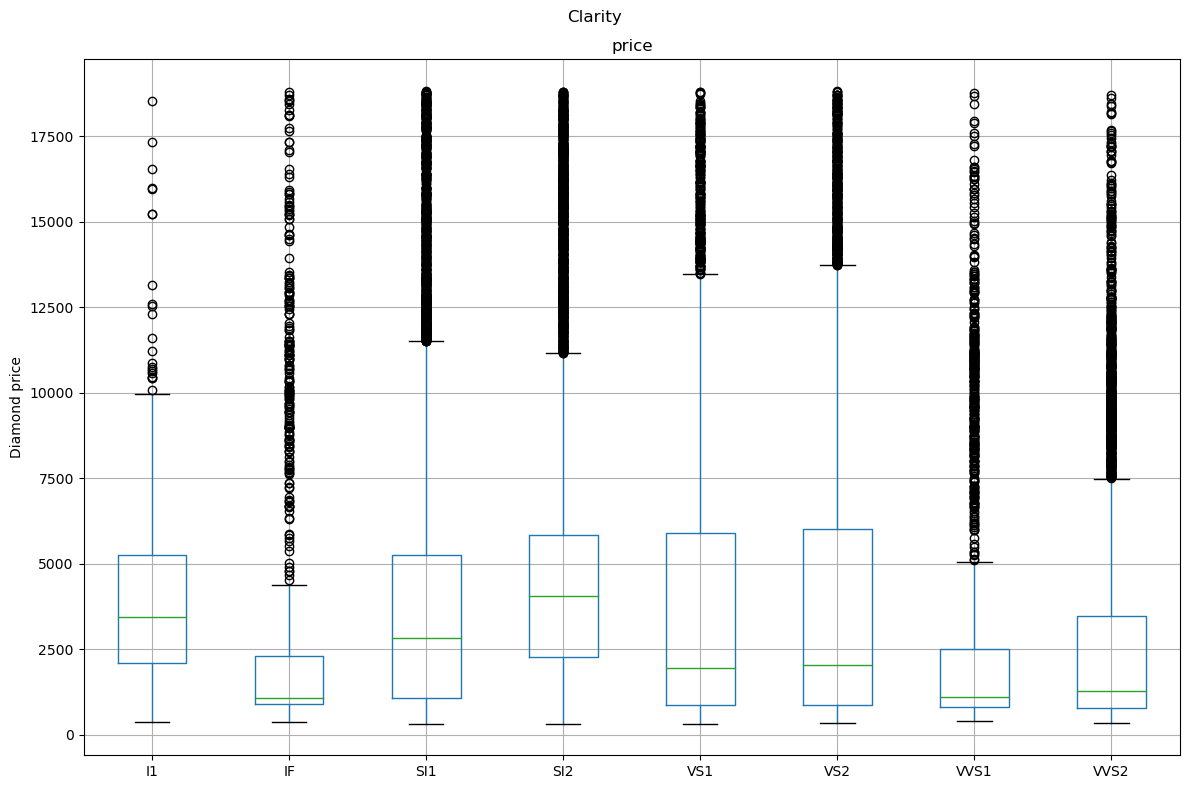

In [48]:
ax = df_merged.boxplot(by='clarity',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('Diamond price')
plt.suptitle('Clarity')
plt.tight_layout()

In [49]:
#Se intuye que el clarity afecta en el precio.

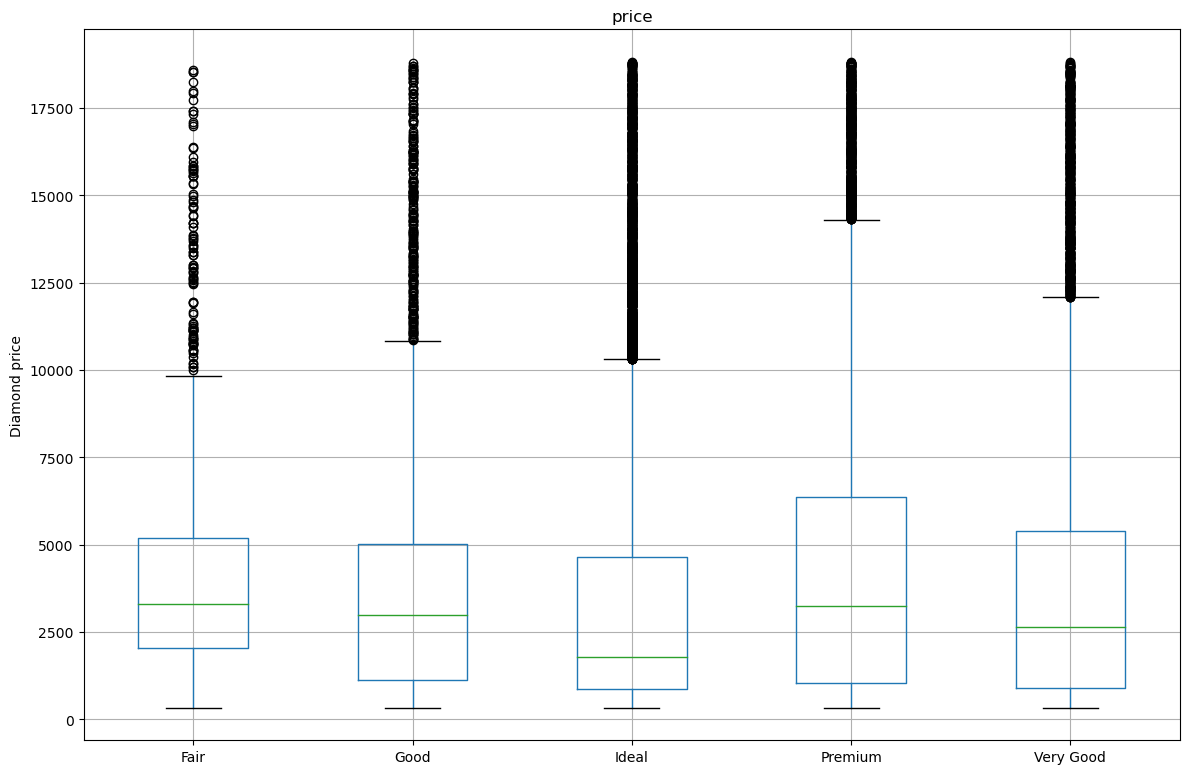

In [50]:
ax = df_merged.boxplot(by='cut',
                           column='price',
                           figsize=(12, 8))
ax.set_xlabel('')
ax.set_ylabel('Diamond price')
plt.suptitle('')
plt.tight_layout()

In [51]:
#Se intuye que el clarity afecta en el precio. Premium podría ser mejor. 

In [52]:
proporcion_cut = df_merged['cut'].value_counts(normalize=True)
round(proporcion_cut,2)

cut
Ideal        0.40
Premium      0.25
Very Good    0.22
Good         0.09
Fair         0.03
Name: proportion, dtype: float64

In [53]:
proporcion_clarity = df_merged['clarity'].value_counts(normalize=True)
round(proporcion_clarity,2)

clarity
SI1     0.24
VS2     0.23
SI2     0.17
VS1     0.15
VVS2    0.09
VVS1    0.07
IF      0.03
I1      0.01
Name: proportion, dtype: float64

In [54]:
proporcion_color = df_merged['color'].value_counts(normalize=True)
round(proporcion_color,2)

color
G    0.21
E    0.18
F    0.18
H    0.16
D    0.12
I    0.10
J    0.05
Name: proportion, dtype: float64

In [55]:
def summarize (df, group_column):
    # Calcular las operaciones de agregación
    mean_price = round(df.groupby(group_column)['price'].mean(), 2)
    median_price = round(df.groupby(group_column)['price'].median(), 2)
    std_price = round(df.groupby(group_column)['price'].std(), 2)
    min_price = round(df.groupby(group_column)['price'].min(), 2)
    max_price = round(df.groupby(group_column)['price'].max(), 2)

    # Concatenar los resultados en una tabla
    resultados = pd.concat([mean_price, median_price, std_price, min_price, max_price], axis=1)
    resultados.columns = ['Mean Price', 'Median Price', 'Std Price', 'Min Price', 'Max Price']
    
    return resultados


In [56]:
summarize(df_merged, 'cut')

,Mean Price,Median Price,Std Price,Min Price,Max Price
cut,,,,,
Fair,4333.27,3302.0,3496.47,337,18574
Good,3880.61,2990.0,3647.04,327,18788
Ideal,3436.11,1787.0,3790.91,326,18806
Premium,4617.32,3242.5,4380.36,326,18823
Very Good,3994.44,2644.0,3955.19,337,18818


In [57]:
summarize(df_merged, 'clarity')

,Mean Price,Median Price,Std Price,Min Price,Max Price
clarity,,,,,
I1,3971.21,3439.0,2804.71,361,18531
IF,2797.90,1080.0,3834.63,369,18806
SI1,3999.86,2822.0,3821.25,326,18818
SI2,5101.04,4072.0,4288.07,326,18791
VS1,3796.81,1957.0,4001.99,327,18795
VS2,3913.59,2036.5,4029.64,334,18823
VVS1,2559.50,1097.0,3333.51,395,18777
VVS2,3240.98,1289.0,3794.54,354,18718


In [58]:
summarize(df_merged, 'color')

,Mean Price,Median Price,Std Price,Min Price,Max Price
color,,,,,
D,3134.94,1820.0,3315.70,357,18693
E,3088.34,1735.0,3354.55,326,18731
F,3677.36,2312.0,3771.41,342,18791
G,4023.21,2262.0,4063.95,354,18818
H,4476.47,3447.0,4204.04,337,18795
I,5090.87,3709.5,4768.11,334,18823
J,5346.23,4268.5,4437.97,335,18710


## Analisis de númericas más relevantes. Carat/x


In [59]:
binnedCarat= pd.cut(df_merged['carat'], 10)

binnedCarat.name = 'binnedCarat'
df = pd.concat([df_merged, binnedCarat], axis=1)
df = df.sort_values(by='carat')

summarize(df, 'binnedCarat')

,Mean Price,Median Price,Std Price,Min Price,Max Price
binnedCarat,,,,,
"(0.196, 0.63]",1054.89,902.0,523.33,326,6549
"(0.63, 1.06]",4035.32,3689.0,1772.74,945,18542
"(1.06, 1.49]",6732.33,6098.0,2334.07,2260,18700
"(1.49, 1.92]",10849.50,10548.0,2987.15,3105,18806
"(1.92, 2.35]",14712.74,15096.0,2789.30,5045,18823
"(2.35, 2.78]",15723.93,16466.0,2621.69,6289,18766
"(2.78, 3.21]",14560.77,16287.5,4092.19,6512,18788
"(3.21, 3.64]",14419.40,12587.0,2832.00,12300,18701
"(3.64, 4.07]",15476.67,15223.0,439.36,15223,15984


In [60]:
binnedX= pd.cut(df_merged['x'], 10)

binnedX.name = 'binnedX'
df = pd.concat([df_merged, binnedX], axis=1)
df = df.sort_values(by='x')

summarize(df, 'binnedX')


,Mean Price,Median Price,Std Price,Min Price,Max Price
binnedX,,,,,
"(-0.0102, 1.023]",6725.80,4954.0,6583.62,2130.0,18034.0
"(1.023, 2.046]",NaN,NaN,NaN,NaN,NaN
"(2.046, 3.069]",NaN,NaN,NaN,NaN,NaN
"(3.069, 4.092]",506.93,505.0,88.48,326.0,817.0
"(4.092, 5.115]",861.49,802.0,316.20,334.0,3920.0
"(5.115, 6.138]",2387.99,2295.0,838.88,770.0,7747.0
"(6.138, 7.161]",5822.77,5278.0,2120.57,816.0,18700.0
"(7.161, 8.184]",11556.33,11263.0,3345.06,3105.0,18818.0
"(8.184, 9.207]",15195.62,15499.0,2511.36,5696.0,18823.0


In [61]:
#group by de las tres catgorias para sacar las proporciones para ver diamante tipo 


